# Crime Classification of San Francisco
From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Creating a dataframe
data= pd.read_csv("train.csv")
data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [2]:
# Checking if there are any missing or null data
data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [3]:
#Check the data types of all columns in dataframe
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [4]:
# Change Data type of Dates from object to Dates
data.Dates = pd.to_datetime(data.Dates)

In [5]:
#Creating New Columns
data['Year'] = data.Dates.dt.year
data['Month'] = data.Dates.dt.month
data['Day'] = data.Dates.dt.day
data['Hour'] = data.Dates.dt.hour

## Charts Visualizing Data

Text(0.5,1,'Development of Crimes from 2003-2015')

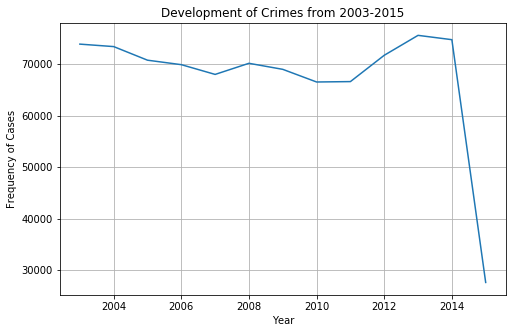

In [6]:
#Plotting Crime Frequencies Base on Years
data.Year.value_counts(sort=False).plot(kind='line',grid=True,figsize=(8,5))
plt.xlabel("Year")
plt.ylabel("Frequency of Cases")
plt.title("Development of Crimes from 2003-2015")

Text(0.5,1,'Number of Crimes Daily per Year')

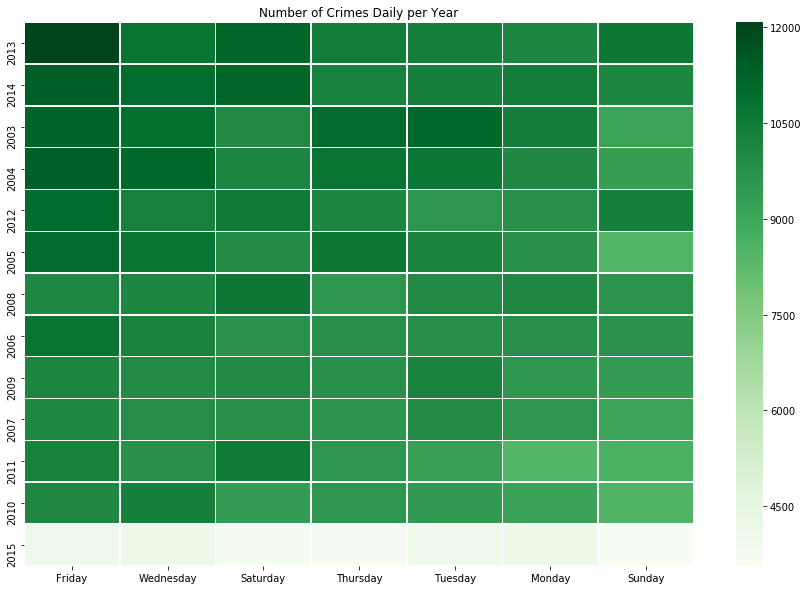

In [7]:
most_year = data.Year.value_counts()
number_of_crimes_daily = data.DayOfWeek.value_counts()
pt = pd.pivot_table(data,index="Year",columns="DayOfWeek",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_year.index,number_of_crimes_daily.index]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(_,cmap='Greens',fmt='d',linewidths=.5)
ax.set_title("Number of Crimes Daily per Year")

<function matplotlib.pyplot.show(*args, **kw)>

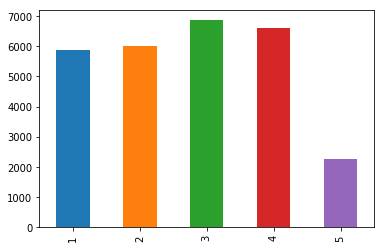

In [8]:
#Year 2015 Data is incomplete
data[data.Year.isin([2015])].Month.value_counts(sort=False).plot(kind='bar')
plt.show

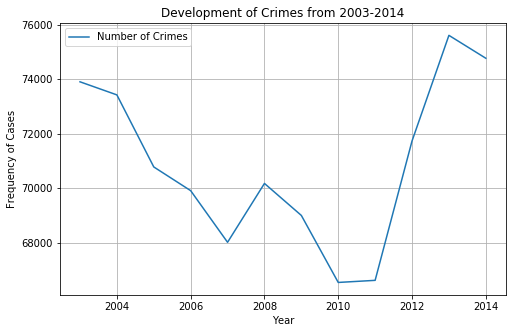

In [9]:
#Exclusion of Year 2015(Jan-May)
data.Year.value_counts(sort=False)[:-1].plot(kind='line',grid=True,figsize=(8,5),label='Number of Crimes')
plt.xlabel("Year")
plt.ylabel("Frequency of Cases")
plt.title("Development of Crimes from 2003-2014")
plt.legend()
plt.show()

Text(0.5,1,'Number of Crimes Daily per Year')

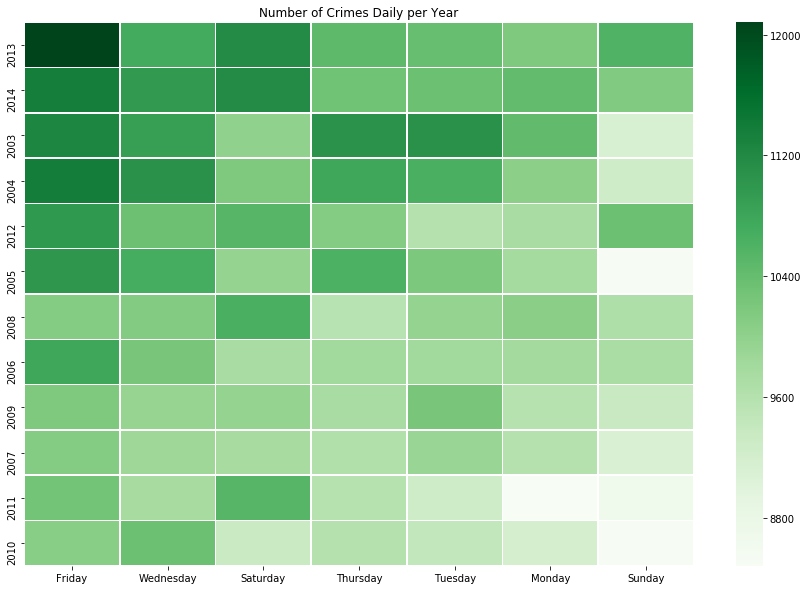

In [10]:
most_year = data.Year.value_counts()
number_of_crimes_daily = data.DayOfWeek.value_counts()
pt = pd.pivot_table(data,index="Year",columns="DayOfWeek",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_year[:-1].index,number_of_crimes_daily.index]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(_,cmap='Greens',fmt='d',linewidths=.5)
ax.set_title("Number of Crimes Daily per Year")

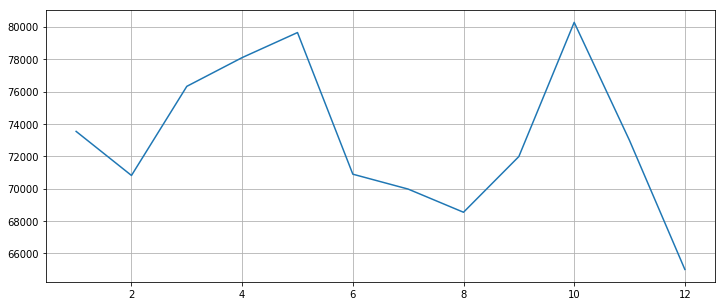

In [11]:
data.Month.value_counts(sort=False).plot(kind='line',figsize=(12,5),grid=True)

Text(0.5,1,'Frequency of Daily Crimes')

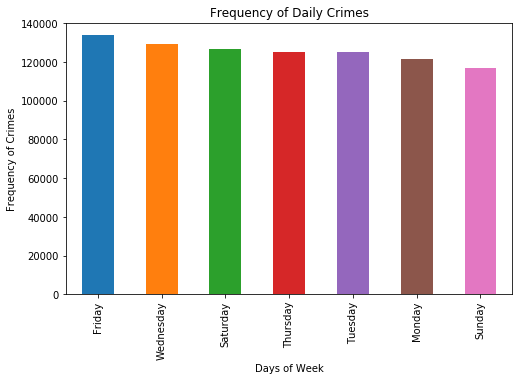

In [12]:
data.DayOfWeek.value_counts().plot(kind='Bar',figsize=(8,5))
plt.xlabel("Days of Week")
plt.ylabel("Frequency of Crimes")
plt.title("Frequency of Daily Crimes")

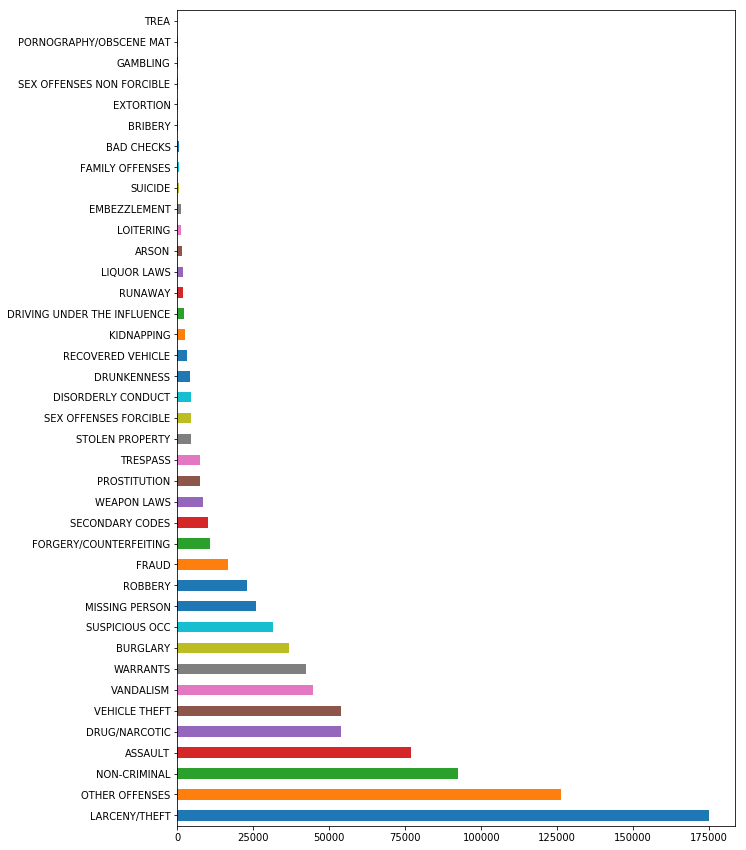

In [13]:
data.Category.value_counts().plot(kind='barh',figsize=(10,15))

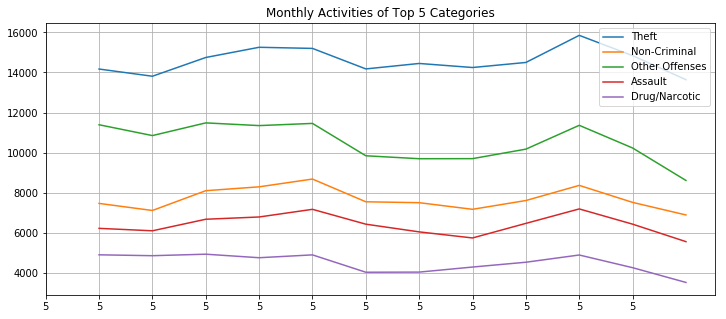

In [19]:
data[data.Category.isin(["LARCENY/THEFT"])].Month.value_counts(sort=False).plot(grid=True, kind='line',figsize=(12,5),label='Theft')
data[data.Category.isin(["NON-CRIMINAL"])].Month.value_counts(sort=False).plot(kind='line',grid=True,figsize=(12,5),label='Non-Criminal')
data[data.Category.isin(["OTHER OFFENSES"])].Month.value_counts(sort=False).plot(kind='line',grid=True,figsize=(12,5),label='Other Offenses')
data[data.Category.isin(["ASSAULT"])].Month.value_counts(sort=False).plot(grid=True, kind='line',figsize=(12,5),label='Assault')
data[data.Category.isin(["DRUG/NARCOTIC"])].Month.value_counts(sort=False).plot(grid=True, kind='line',figsize=(12,5),label='Drug/Narcotic')
plt.title('Monthly Activities of Top 5 Categories')
plt.xticks(np.arange(12),data.Month)
plt.legend()
plt.show()

Text(0.5,1,'')

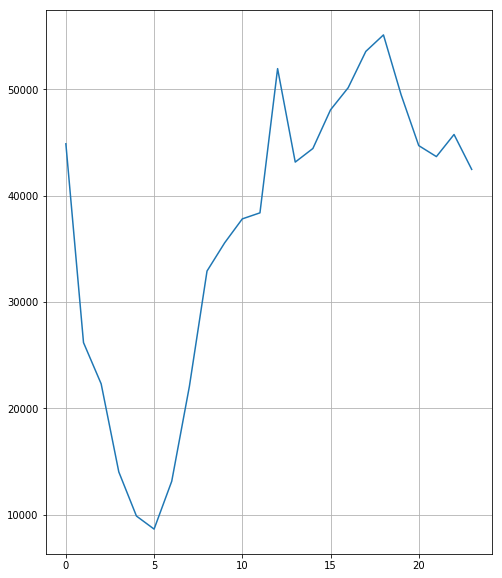

In [20]:
data.Hour.value_counts(sort=False).plot(kind='line',figsize=(8,10),grid=True)
plt.title('')

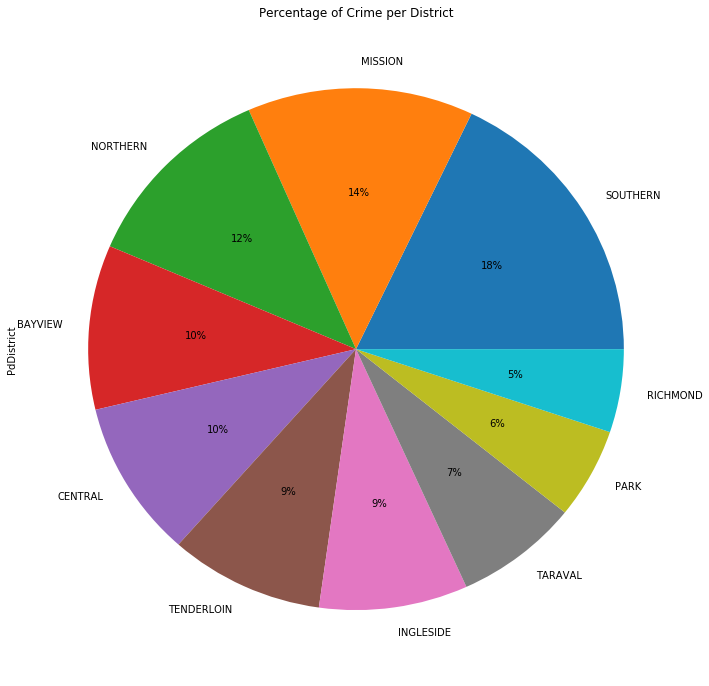

In [21]:
data.PdDistrict.value_counts().plot(kind='pie',figsize=(12,12),title='Percentage of Crime per District',autopct='%1.0f%%')

Text(0.5,1,'Number of Crimes per District')

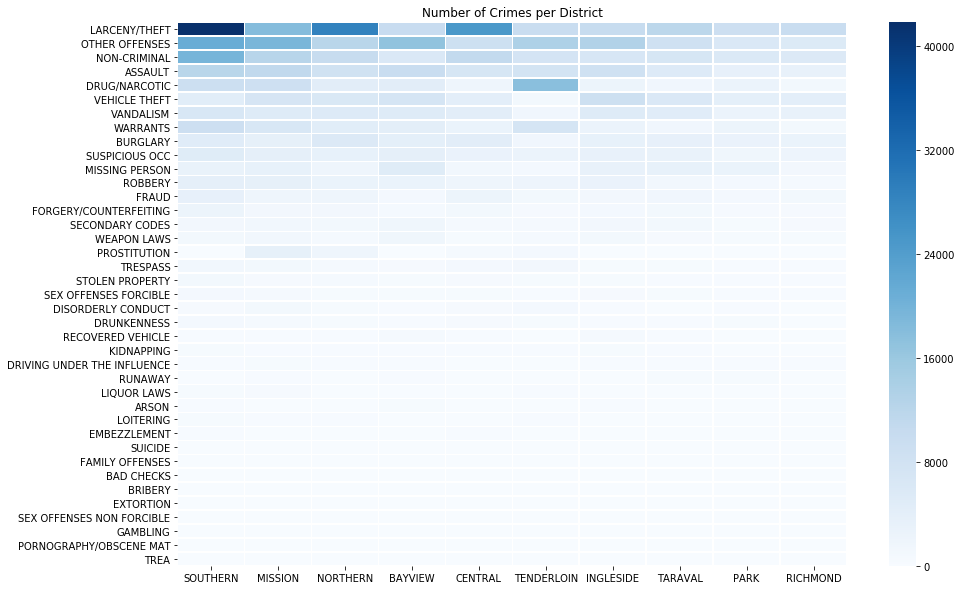

In [22]:
most_dangerous_districts = data.PdDistrict.value_counts()
number_of_crimes = data.Category.value_counts()
pt = pd.pivot_table(data,index="Category",columns="PdDistrict",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[number_of_crimes.index,most_dangerous_districts.index]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(_,cmap='Blues',fmt='d',linewidths=.5)
ax.set_title("Number of Crimes per District")

Text(0.5,1,'Crimes Category per Day')

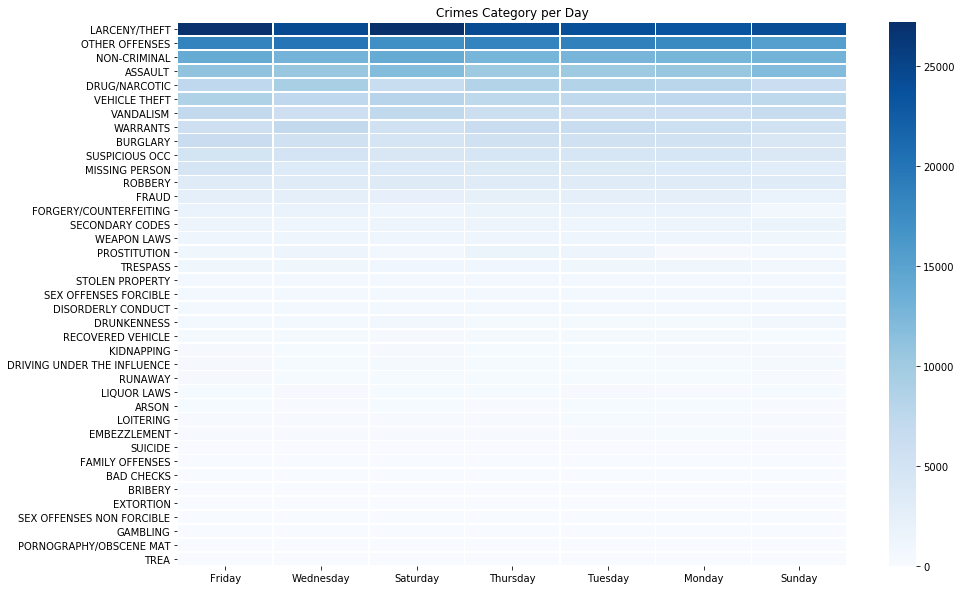

In [23]:
most_dangerous_category = data.Category.value_counts()
number_of_day = data.DayOfWeek.value_counts()
pt = pd.pivot_table(data,index="Category",columns="DayOfWeek",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_dangerous_category.index,number_of_day.index]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(_,cmap='Blues',fmt='d',linewidths=.5)
ax.set_title("Crimes Category per Day")

In [25]:
#Replacing Month 
data_Month={
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'June',
    7:'July',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
data["Month"]= data["Month"].replace(data_Month)

Text(0.5,1,'Crimes Heatmap of Year agaisnt Month')

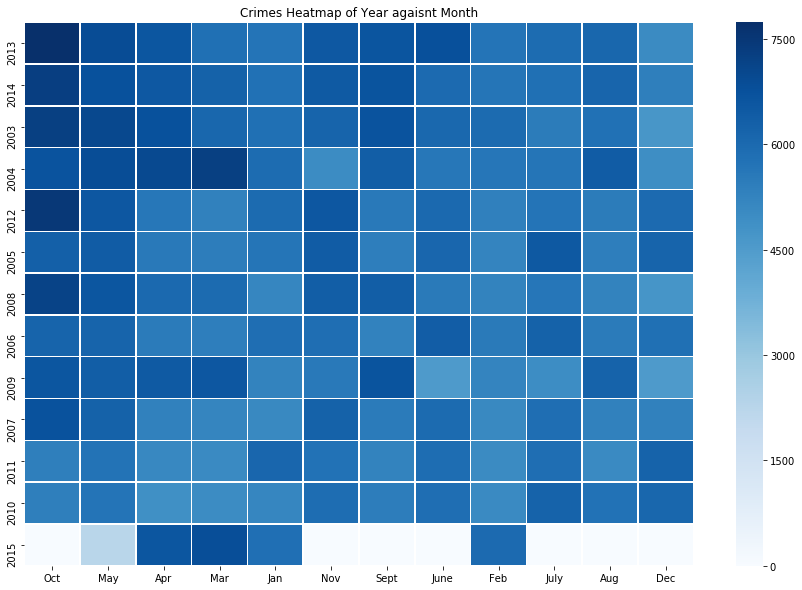

In [26]:
most_dangerous_Year = data.Year.value_counts()
number_of_Month = data.Month.value_counts()
pt = pd.pivot_table(data,index="Year",columns="Month",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_dangerous_Year.index,number_of_Month.index]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(_,cmap='Blues',fmt='d',linewidths=.5)
ax.set_title("Crimes Heatmap of Year agaisnt Month")

### Removing 2015 From the heatmap for better visuals

Text(0.5,1,'Crimes Heatmap of Year agaisnt Month')

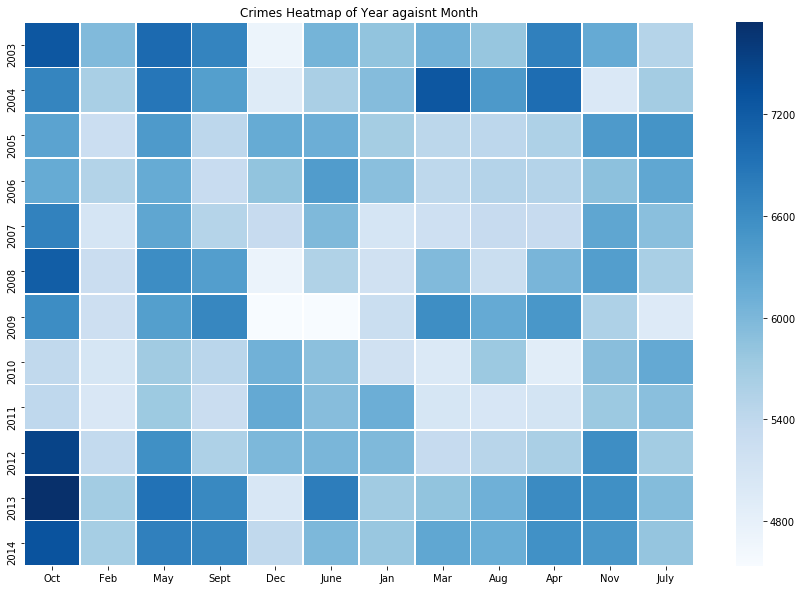

In [27]:
most_dangerous_Year = data.Year.value_counts(sort=False)[:-1]
number_of_Month = data.Month.value_counts(sort=False)
pt = pd.pivot_table(data,index="Year",columns="Month",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_dangerous_Year.index,number_of_Month.index]
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(_,cmap='Blues',fmt='d',linewidths=.5)
ax.set_title("Crimes Heatmap of Year agaisnt Month")